In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from scipy.optimize import minimize
import ipi_project as ipi
import phantoms
from skimage.filters import gaussian

import matplotlib.pyplot as plt

import astra

from topolar import topolar


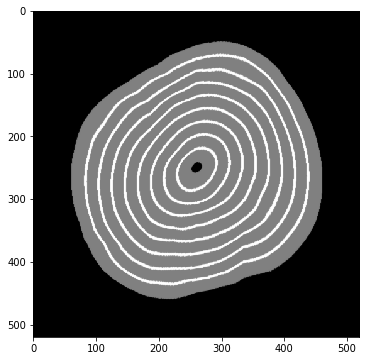

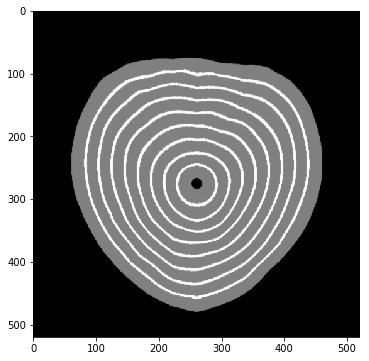

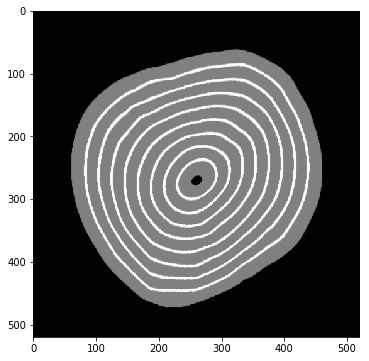

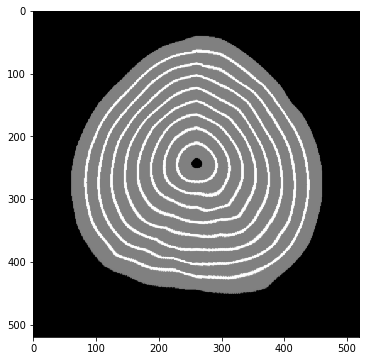

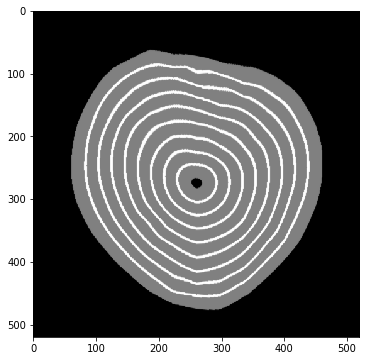

In [55]:
circle = phantoms.circle(500,12, wall_thickness=25)
circle = np.pad(circle, pad_width=10, mode='constant', constant_values=0)
circle = gaussian(circle, sigma=0.5, preserve_range=True)
for _ in range(5):
    wobbly, src, inv_src = phantoms.wobbly_transform(circle, amplitude=18)
    #wobbly = gaussian(wobbly, sigma=1.0, preserve_range=True)


    plt.figure(figsize=(6,6))
    plt.imshow(wobbly, cmap='gray')
    plt.show()

In [3]:
A = ipi.astra_proj_matrix(64, proj_size=circle.shape[0], proj_angles=np.linspace(0, 2.0*np.pi, 5))

In [5]:
sino = A @ circle.ravel()

ValueError: dimension mismatch

In [6]:
print("A ", A.shape)
type(A)
print("A flat", np.ravel(A).shape)
print("Circle flat", circle.ravel().shape)

A  (640, 4096)
A flat (1,)
Circle flat (16384,)


In [ ]:
4096 / 128

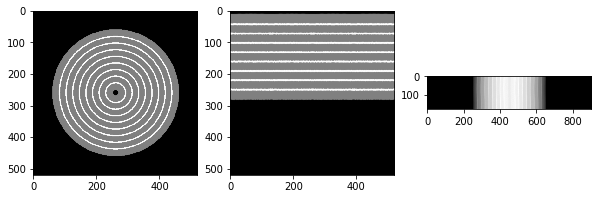

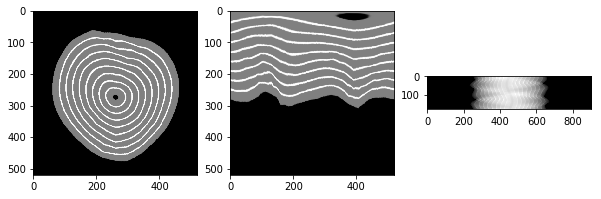

In [59]:
W, proj_id = ipi.create_OpTomo(circle.shape[0], proj_size=900, proj_angles=np.linspace(0, 2.0*np.pi, 180))
def polar_and_sinogram(phantom, proj_id):

    _, sino = astra.creators.create_sino(phantom, proj_id)


    plt.figure(figsize=(10,10))
    plt.subplot(131)
    plt.imshow(phantom, cmap='gray')
    plt.subplot(132)
    plt.imshow(topolar(phantom)[0], cmap='gray')
    plt.subplot(133)
    plt.imshow(sino, cmap='gray')
    plt.show()
    
    
polar_and_sinogram(circle, proj_id)
polar_and_sinogram(wobbly, proj_id)

In [10]:
def make_forward_diff(size):
    Dx = np.diag([1.0]*size) - np.diag([1.0]*(size -1), k=1)
    Dx[-1,0] = -1.0
    return Dx
                                     

In [47]:
def polar_line_regularization(image, Dx):
    polar_img = topolar(image)[0]
    diff_x =  polar_img @ Dx
    plt.imshow(np.abs(diff_x), cmap='gray')
    plt.show()
    return diff_x

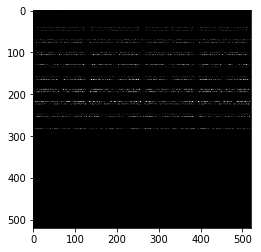

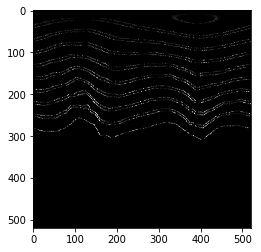

Circ reg 18.570657274169754
Wobbly reg 23.409601119778902


In [63]:
Dx = make_forward_diff(circle.shape[0])
circ_reg = polar_line_regularization(circle, Dx)
wobbly_reg = polar_line_regularization(wobbly, Dx)

print("Circ reg", np.linalg.norm(circ_reg))
print("Wobbly reg", np.linalg.norm(wobbly_reg))

In [30]:
np.min(wobbly_reg)

-0.9843426487778295

In [31]:
np.max(wobbly_reg)

0.9791185179216253

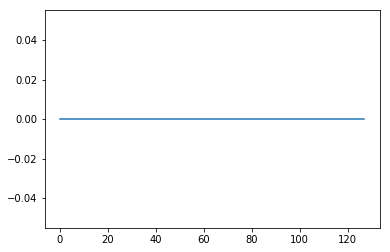

In [46]:
plt.plot(wobbly_reg[100])

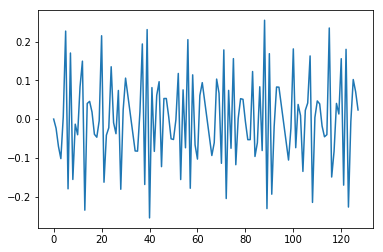

In [41]:
plt.plot(circ_reg[40])